In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import numpy as np

# 1.1

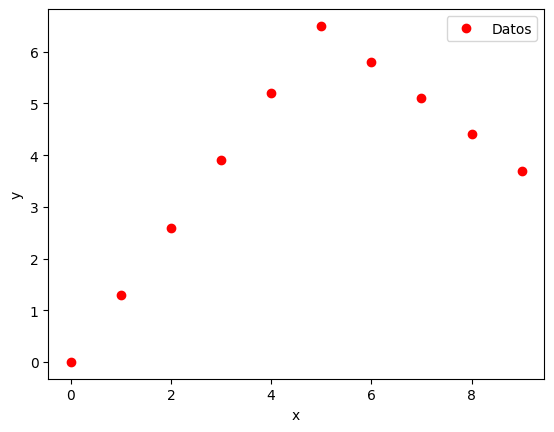

In [20]:
# Buen trabajo
# 5.0
df = pd.read_csv('fit_curve.csv') #cargo el archivo csv

x = df['x'].values #obtengo los valores de x
y = df['y'].values #obtengo los valores de y

plt.plot(x, y, 'ro', label='Datos') #muestro datos
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# $ \blacksquare $ proponga una curva y calcule error

Parámetros optimizados:  [-0.18939412  2.15606222 -0.45454755]
Chi2:  1.6666666666841896


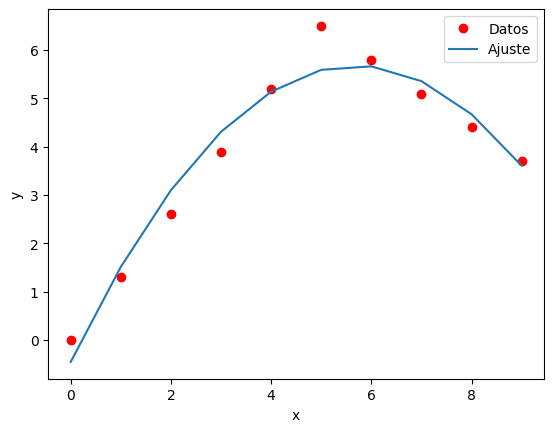

In [32]:
def f(x, param): #funcion a ajustar cuadratica
    return param[0]*x**2 + param[1]*x + param[2] #param[0] = a, param[1] = b, param[2] = c

def chi2(param): #funcion chi2
    return np.sum(np.square(y-f(x,param)))

result = minimize(chi2, [1,1,1]) #minimizo chi2
print('Parámetros optimizados: ',result.x) #imprimo los parametros optimizados
print('Chi2: ',chi2(result.x)) #imprimo chi2

plt.plot(x, y, 'ro', label='Datos') #muestro datos
plt.plot(x, f(x, result.x), label='Ajuste') #muestro ajuste
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()





# $\blacksquare$ considere una gaussiana

Parámetros optimizados:  [6.19486322 5.74654926 1.9677472 ]
Chi2:  1.5817602776494377


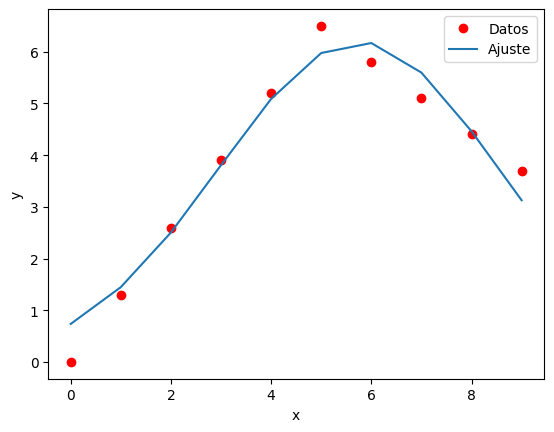

In [33]:
def gauss(x,param): #funcion gaussiana
    return param[0]*np.exp(-(x-param[1])**2/(2*param[2])**2) #param[0] = A, param[1] = mu, param[2] = sigma

def chi2(param): #funcion chi2
    return np.sum(np.square(y-gauss(x,param)))

result = minimize(chi2, [1,1,1]) #minimizo chi2
print('Parámetros optimizados: ',result.x) #imprimo los parametros optimizados
print('Chi2: ',chi2(result.x)) #imprimo chi2

plt.plot(x, y, 'ro', label='Datos') #muestro datos
plt.plot(x, gauss(x, result.x), label='Ajuste') #muestro ajuste
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()




# $\blacksquare$ función mas general

Parámetros optimizados:  [ 516.02717053    3.05241957   26.017938   -514.71360515]
Chi2:  1.6705914497598817


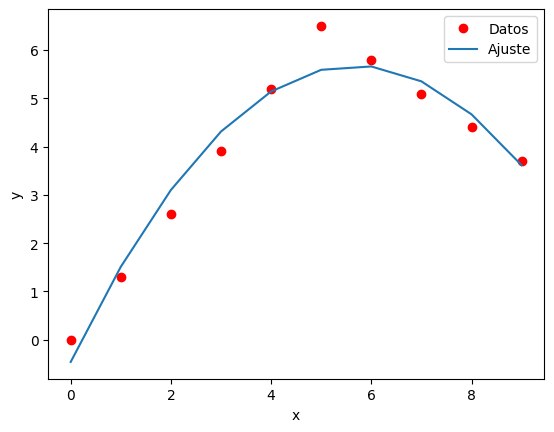

In [34]:
def ggauss(x,param): #funcion gaussiana mas general
    return x + param[3] + param[0]*np.exp(-(x-param[1])**2/(2*param[2])**2) #param[0] = A, param[1] = mu, param[2] = sigma, param[3] = b

def chi2(param): #funcion chi2
    return np.sum(np.square(y-ggauss(x,param)))

result = minimize(chi2, [1,1,1,1]) #minimizo chi2
print('Parámetros optimizados: ',result.x) #imprimo los parametros optimizados
print('Chi2: ',chi2(result.x)) #imprimo chi2

plt.plot(x, y, 'ro', label='Datos') #muestro datos
plt.plot(x, ggauss(x, result.x), label='Ajuste') #muestro ajuste
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()





# 1.2

# $\blacksquare$ tres plots

In [54]:
# Buen trabajo
# 5.0
dfa = pd.read_csv('auto.csv') #cargo el archivo csv
dfa.head() #muestro los primeros 5 datos


Unnamed: 0  symboling  normalized-losses         make aspiration  \
0           0          3                122  alfa-romero        std   
1           1          3                122  alfa-romero        std   
2           2          1                122  alfa-romero        std   
3           3          2                164         audi        std   
4           4          2                164         audi        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   compression-ratio  horsepower  peak-rpm  city-mpg highway-mpg    price  \
0                9.0       111.0    5000.0        21          27  13495.0   
1                9.0       111.0    5000.0        21          27  16500.0   
2                9.0       154.0    5000.0        19          26  16500.0   
3               10.0       102.0    5500.0        24          30  13950.0   
4                8.0       115.0    5500.0        18          22  17450.0   

   city-L/100km horsepower-binned  diesel  gas  
0     11.190476            Medium       0    1  
1     11.190476            Medium       0    1  
2     12.368421            Medium       0    1  
3      9.791667            Medium       0    1  
4     13.055556            Medium       0    1  

[5 rows x 30 columns]

In [69]:
dfa.sort_values(by=['horsepower'], ascending=True, inplace=True) #ordeno los datos por horsepower de menor a mayor
dfa.head() #muestro los primeros 5 datos

Unnamed: 0  symboling  normalized-losses        make aspiration  \
17           17          2                121   chevrolet        std   
178         178          2                122  volkswagen        std   
180         180          2                 94  volkswagen        std   
87           87          1                128      nissan        std   
154         154          0                 91      toyota        std   

    num-of-doors body-style drive-wheels engine-location  wheel-base  ...  \
17           two  hatchback          fwd           front        88.4  ...   
178          two      sedan          fwd           front        97.3  ...   
180         four      sedan          fwd           front        97.3  ...   
87           two      sedan          fwd           front        94.5  ...   
154         four      sedan          fwd           front        95.7  ...   

     compression-ratio  horsepower  peak-rpm  city-mpg highway-mpg   price  \
17                 9.5        48.0    5100.0        47          53  5151.0   
178               23.0        52.0    4800.0        37          46  7775.0   
180               23.0        52.0    4800.0        37          46  7995.0   
87                21.9        55.0    4800.0        45          50  7099.0   
154               22.5        56.0    4500.0        34          36  7898.0   

     city-L/100km horsepower-binned  diesel  gas  
17       5.000000               Low       0    1  
178      6.351351               Low       1    0  
180      6.351351               Low       1    0  
87       5.222222               Low       1    0  
154      6.911765               Low       1    0  

[5 rows x 30 columns]

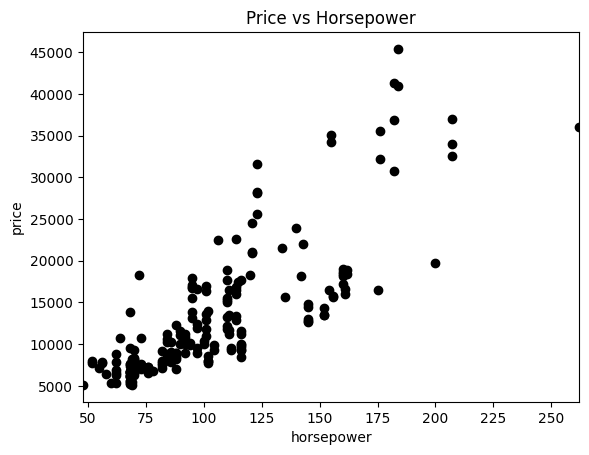

In [85]:
plt.plot(dfa['horsepower'], dfa['price'], 'ko', label='Datos') #muestro datos
plt.xlabel('horsepower')
plt.ylabel('price')
plt.xlim(dfa['horsepower'].min(), dfa['horsepower'].max())
plt.title('Price vs Horsepower')
#plt.legend()
plt.show()


De este gráfico podemos concluir dos cosas, lo primero es que los caballos de fuerza de la mayoría de lso vehiculos están entre 50 a 125, pues es donde se ve mas acumulación de puntos, ademas en este rango el precio tambien permanece entre un intervalo pequeño, entre 500 y 15000 $, de esto podemos concluir que los autos que estamos vendiendo son en general autos económicos de baja potencia, para un publico que busca autos mas para el día a día y no un deportivo.
Como segunda conclusión vemos que a mayor caballos de fuerza mayor precio en general, vemos entonces que la potencia del vehiculo si tiene un impacto sobre el precio de este.

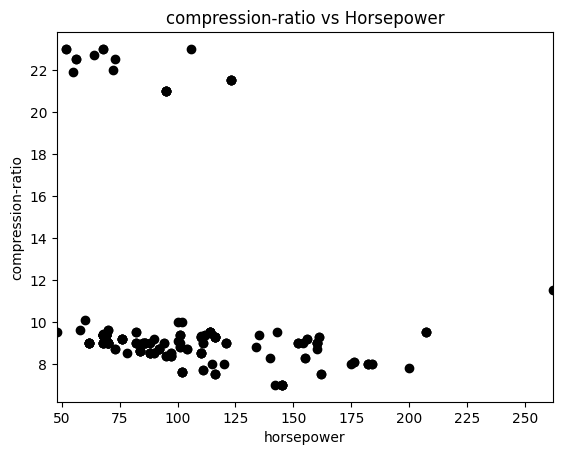

In [87]:
plt.plot(dfa['horsepower'], dfa['compression-ratio'], 'ko', label='Datos') #muestro datos
plt.xlabel('horsepower')
plt.ylabel('compression-ratio')
plt.xlim(dfa['horsepower'].min(), dfa['horsepower'].max())
plt.title('compression-ratio vs Horsepower')
#plt.legend()
plt.show()


De este gráfico podemos concluir que a mayor caballos de fuerza no necesariamente significa mayor ratio de compresión  del combustible, podemos atribuir esto entonces a otros factores, ademas, vemos que la mayoria de los vehiculos aunque con diferentes potencias simepre intentan mantenerse en un rango entre 8 a 10 para el ratio, seguramente buscando economizar en combustible y tambien en regulaciones de emisiones, pues a mayor quema de combustuble mayor emisión.

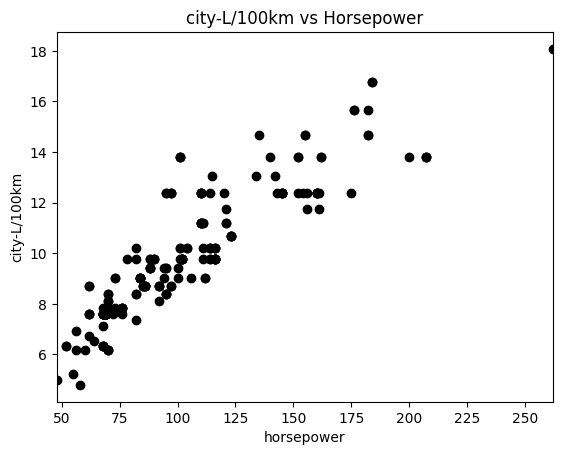

In [89]:
plt.plot(dfa['horsepower'], dfa['city-L/100km'], 'ko', label='Datos') #muestro datos
plt.xlabel('horsepower')
plt.ylabel('city-L/100km')
plt.xlim(dfa['horsepower'].min(), dfa['horsepower'].max())
plt.title('city-L/100km vs Horsepower')
#plt.legend()
plt.show()

Este gráfico nos muestra que al aumentar la potencia del vehiculo mayor va a ser su consumo en combustible en ciudad, aumentando la cantidad de litros que necesita para recorrer 100 km.

# $\blacksquare$ informe:


Informe de Relaciones de Variables en la Base de Datos de Ventas de Autos

Fecha: 27 de mayo de 2023

Estimado gerente de ventas de autos,


1. Caballos de fuerza - Precio:
   La relación entre el precio y los caballos de potencia de un automóvil es una de las más significativas en el contexto de las ventas de vehículos. Los caballos de potencia son una medida de la capacidad del motor para generar energía, lo cual influye directamente en el rendimiento y la velocidad del automóvil. A medida que aumenta la potencia del motor, generalmente se espera que el precio del vehículo también aumente.

   Esta relación es importante porque los compradores de autos suelen tener preferencias específicas en cuanto al rendimiento y la potencia del vehículo que desean adquirir. Aquellos que buscan un rendimiento más deportivo o una experiencia de conducción más potente estarán dispuestos a invertir más dinero en un automóvil con mayor caballos de potencia. Por otro lado, los compradores que buscan un automóvil más económico y de uso diario pueden optar por modelos con menor potencia, lo que se reflejará en un precio más bajo.



2. Caballos de fuerza - Consumo de combustible (litros/100 km):
   La relación entre los caballos de fuerza y el consumo de combustible es fundamental para comprender el rendimiento y la eficiencia de un automóvil. Los caballos de fuerza representan la potencia del motor, mientras que el consumo de combustible indica la cantidad de combustible requerida por el automóvil para recorrer una determinada distancia.

   La importancia de esta relación radica en la demanda de eficiencia y ahorro de combustible por parte de los consumidores. En general, se espera que los automóviles con mayor potencia de motor consuman más combustible. Sin embargo, los avances tecnológicos y las mejoras en el diseño de los motores han permitido reducir este consumo en algunos casos.


Por tanto si tenemos en cuenta estas variable podemos garantizar un buen margen de ganancia sabiendo hacia quien va dirigido el vehiculo y ajustando el precio según esto, y ademas promocionando bajos consumos de combustible que puedan permitir ofertas irressitibles para nuestros clientes. 



